In [29]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative"
RUN_NAME = "cpg_enrichment_1_rep_in_cpg"

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents


In [30]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(f"{BASE_DIR}/results/no_dedup/cpg_enrichment/NSC/broad/{RUN_NAME}/cpg_enrichment_parallel.csv")

In [31]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (14941, 31)

First few rows:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3531624,3531843,219,611,CpG:,0.163694,1.963792,0.083356,0.333333,both,False,2,2,6,5,"0.0,0.8098031788656156,0.1723623754771333,0.0,0.0,0.0","0.0,7.742945475121067,0.0,0.0,2.076016413022394",0,0,NaN,5.10095,3531624,3531843,219,0.295724,2.999355,1.806561,1.527328,0,1
1,chr1,3670619,3671074,455,613,CpG:,33.951766,15.898827,2.135489,0.285714,both,False,6,1,6,5,"47.333859716142925,32.34496787354186,27.57420218541072,42.31702634371244,53.90242758321238,0.23810998528868288","0.0,0.0,0.0,79.49413669711942,0.0",0,0,6.06037,NaN,3670619,3671074,455,17.449702,31.797655,0.513956,2.000000,1,0
2,chr1,3671654,3672156,502,613,CpG:,52.511660,35.442203,1.481614,0.792208,both,False,6,5,6,5,"3.061797170525053,65.91187516626609,100.02656144829861,5.682240710315476,108.34127548111387,32.046211683417695","35.88782899408226,18.74866663412269,8.037706496706047,112.40919069654913,2.1276208831969488",1,0,5.54931;6.06037,NaN,3671654,3672156,502,42.054123,40.158829,0.800853,1.133079,2,0
3,chr1,4491701,4493673,1972,619,CpG:,5.247282,5.391110,0.973321,1.000000,both,False,4,3,6,5,"12.19944750513073,6.809168350382219,3.3497822719945387,0.0,0.0,9.125292064210223","0.0,19.079104030833523,0.0,4.363269704350594,3.513177480949108",1,0,6.0982;5.8282,4.1282,4491701,4493673,1972,4.554842,7.072092,0.868038,1.311806,2,1
4,chr1,4571641,4572075,434,619,CpG:,26.174938,10.728052,2.439859,0.380952,both,False,6,3,6,5,"16.923790716355846,21.50187462705621,16.938446890923284,19.305170516264603,29.013874656044393,53.36646880312449","0.4130419223539291,0.0,2.135811282742408,51.09140839994228,0.0",1,0,4.35039;6.82732;3.40697,NaN,4571641,4572075,434,12.828137,20.197073,0.490092,1.882641,3,0



Column names:
['chr', 'start', 'end', 'cpg_length', 'cpg_name', 'cpg_score', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'total_exo_replicates', 'total_endo_replicates', 'exo_replicate_signals', 'endo_replicate_signals', 'n_exo_peaks', 'n_endo_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'analysis_start', 'analysis_end', 'analysis_length', 'exo_signal_std', 'endo_signal_std', 'exo_signal_cv', 'endo_signal_cv', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks']


In [32]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Display first few rows of sorted DataFrame
print("Top enriched CpG islands:")
display(cpg_enrichment_df_sorted.head())


Top enriched CpG islands:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
10154,chr5,26070670,26071016,346,783,CpG:,0.573830,0.0,inf,1.0,exo_only,False,3,0,6,5,"0.6256705419176576,0.9763092801750051,1.841001455494434,0.0,0.0,0.0","0.0,0.0,0.0,0.0,0.0",0,0,3.56574,NaN,26070670,26071016,346,0.678017,0.0,1.181564,0.0,1,0
51,chr1,19104571,19104923,352,730,CpG:,6.210301,0.0,inf,1.0,exo_only,False,3,0,6,5,"11.307318889281966,0.0,25.73678355325352,0.0,0.0,0.21770102937113156","0.0,0.0,0.0,0.0,0.0",0,0,4.85382,NaN,19104571,19104923,352,9.651234,0.0,1.554069,0.0,1,0
6410,chr18,37012133,37012411,278,867,CpG:,23.367284,0.0,inf,1.0,exo_only,False,6,0,6,5,"51.90116897418345,3.807372065756818,2.664713569682279,6.0487637794275075,34.7477609099244,41.033926446660814","0.0,0.0,0.0,0.0,0.0",0,0,4.97235,NaN,37012133,37012411,278,19.861713,0.0,0.849980,0.0,1,0
6411,chr18,37020351,37020802,451,867,CpG:,9.909000,0.0,inf,1.0,exo_only,False,5,0,6,5,"0.0,19.174640427143242,11.372312692739483,1.0411179409323141,26.928478883798267,0.9374510263920888","0.0,0.0,0.0,0.0,0.0",0,1,NaN,4.49642,37020351,37020802,451,10.287309,0.0,1.038178,0.0,0,1
10892,chr5,139129492,139129720,228,1646,CpG:,0.816685,0.0,inf,1.0,exo_only,False,3,0,6,5,"0.3255368533887361,3.457055635619582,1.1175196547257273,0.0,0.0,0.0","0.0,0.0,0.0,0.0,0.0",1,0,6.16064;4.68025;2.51475,NaN,139129492,139129720,228,1.245272,0.0,1.524787,0.0,3,0


In [33]:
# Split data based on binding type
exo_only_df = cpg_enrichment_df[cpg_enrichment_df['binding_type'] == 'exo_only']
endo_only_df = cpg_enrichment_df[cpg_enrichment_df['binding_type'] == 'endo_only'] 
both_df = cpg_enrichment_df[cpg_enrichment_df['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df)}")
print(f"Number of CpG islands bound by both: {len(both_df)}")


Number of CpG islands bound by exo only: 158
Number of CpG islands bound by endo only: 11
Number of CpG islands bound by both: 14772


In [34]:
print("both_df['enrichment']")
print(both_df['enrichment'])

both_df['enrichment']
0        0.083356
1        2.135489
2        1.481614
3        0.973321
4        2.439859
           ...   
14936    0.009166
14937    3.257545
14938    1.218291
14939    0.424696
14940    0.779198
Name: enrichment, Length: 14772, dtype: float64


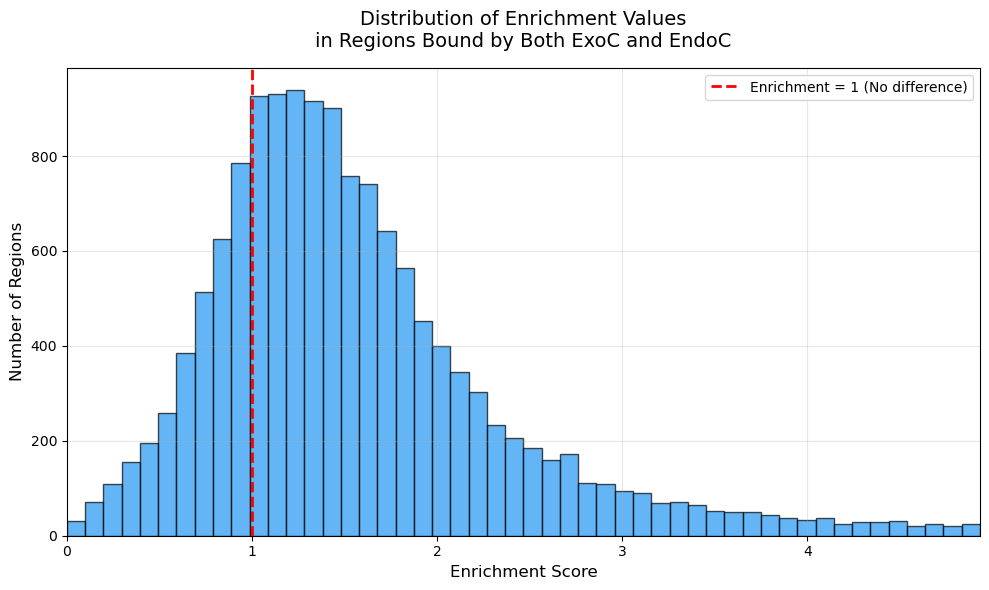

In [35]:
# Create histogram of enrichment values for regions bound by both
plt.figure(figsize=(10, 6))

# Plot histogram with better binning and transparency
# Calculate reasonable range based on data distribution
q1, q3 = both_df['enrichment'].quantile([0.25, 0.75])
factor = 3
iqr = q3 - q1
range_min = max(0, q1 - factor * iqr)  # Don't go below 0 for enrichment
range_max = q3 + factor * iqr

# Plot histogram and get the axis object
n, bins, patches = plt.hist(both_df['enrichment'], bins=50, edgecolor='black', alpha=0.7,
                          color='#2196F3', density=False, range=(range_min, range_max))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Improve axis labels and title
plt.xlabel('Enrichment Score', fontsize=12)
plt.ylabel('Number of Regions', fontsize=12)
plt.title('Distribution of Enrichment Values\nin Regions Bound by Both ExoC and EndoC',
          fontsize=14, pad=15)

# Add vertical line at enrichment = 1
plt.axvline(x=1, color='red', linestyle='--', linewidth=2,
            label='Enrichment = 1 (No difference)')

# Set x-axis limits based on the actual data range
plt.xlim(range_min, range_max)

# Add legend with better positioning
plt.legend(loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


Summary statistics of enrichment values:
count    14772.000000
mean         3.977844
std         86.407021
min          0.007763
25%          1.045439
50%          1.437794
75%          2.017270
max       8774.383723
Name: enrichment, dtype: float64

Number of outliers (enrichment > 4.932762553822844): 757

Top 10 outliers by enrichment value:
         chr      start        end  cpg_length   enrichment
7323    chr2   26138465   26138848         383  8774.383723
6432   chr18   37767918   37768507         589  4498.583965
9921    chr4  148068299  148068522         223  2115.684577
7393    chr2   30062876   30063155         279  2088.836192
14778   chrX  101059591  101059915         324  1001.925752
8852    chr3  105458909  105459252         343   806.698424
1890   chr11   59176424   59177354         930   653.199919
3576   chr13   47010853   47011096         243   624.074844
12787   chr7  140787634  140787929         295   616.385975
11666   chr6  136399201  136399416         215   457.8

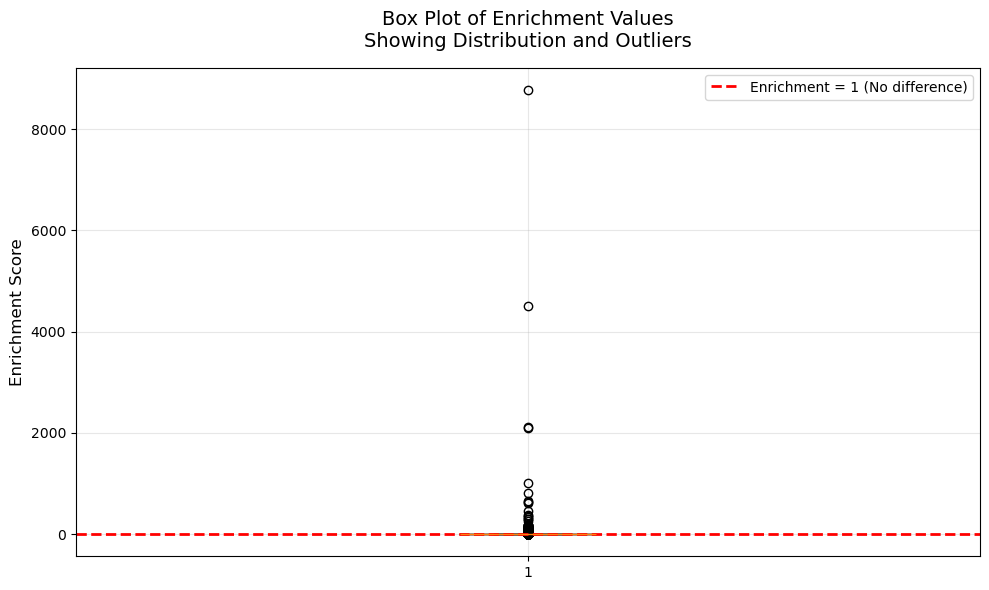

In [36]:
# Print summary statistics of enrichment values
print("Summary statistics of enrichment values:")
print(both_df['enrichment'].describe())

# Find outliers (values > range_max)
outliers_df = both_df[both_df['enrichment'] > range_max].copy()
outliers_df = outliers_df.sort_values('enrichment', ascending=False)

print(f"\nNumber of outliers (enrichment > {range_max}):", len(outliers_df))
print("\nTop 10 outliers by enrichment value:")
print(outliers_df[['chr', 'start', 'end', 'cpg_length', 'enrichment']].head(10))

# Create box plot to visualize distribution and outliers
plt.figure(figsize=(10, 6))
# The whis parameter controls the whisker length in the boxplot
# whis=factor means whiskers extend to points within factor * IQR of Q1/Q3
# Points beyond the whiskers are considered outliers and plotted individually
plt.boxplot(both_df['enrichment'], whis=factor)
plt.ylabel('Enrichment Score', fontsize=12)
plt.title('Box Plot of Enrichment Values\nShowing Distribution and Outliers',
          fontsize=14, pad=15)
plt.grid(True, alpha=0.3)

# Add horizontal line at enrichment = 1
plt.axhline(y=1, color='red', linestyle='--', linewidth=2,
            label='Enrichment = 1 (No difference)')

plt.legend()
plt.tight_layout()
plt.show()


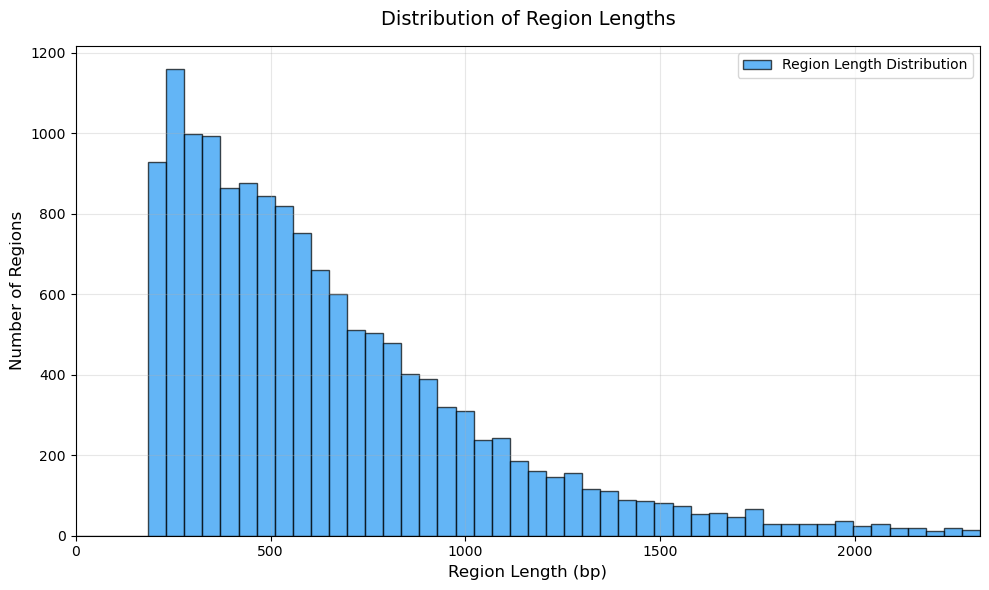

In [38]:
# Create histogram of cpg_length values for regions bound by both
plt.figure(figsize=(10, 6))

# Plot histogram with better binning and transparency
# Calculate reasonable range based on data distribution
q1, q3 = both_df['cpg_length'].quantile([0.25, 0.75])
factor = 3
iqr = q3 - q1
range_min = max(0, q1 - factor * iqr)  # Don't go below 0 for cpg_length
range_max = q3 + factor * iqr

# Plot histogram and get the axis object
n, bins, patches = plt.hist(both_df['cpg_length'], bins=50, edgecolor='black', alpha=0.7,
                          color='#2196F3', density=False, range=(range_min, range_max),
                          label='Region Length Distribution')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Improve axis labels and title
plt.xlabel('Region Length (bp)', fontsize=12)
plt.ylabel('Number of Regions', fontsize=12)
plt.title('Distribution of Region Lengths',
          fontsize=14, pad=15)

# Set x-axis limits based on the actual data range
plt.xlim(range_min, range_max)

# Add legend with better positioning
plt.legend(loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()
